In [114]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [125]:
dataset = pd.read_csv('/home/sourav/Desktop/Project/google-play-store-analysis/Project/Data/googleplaystore.csv', parse_dates = ['Last Updated'])

In [126]:
(dataset['Last Updated'][10472])

'1.0.19'

In [127]:
type(pd.to_datetime(dataset['Last Updated'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [128]:
dataset.loc[[10472]].shift(periods=1, axis =1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,NaN,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [43]:
#dataset.count(axis=1)

In [129]:
dataset.drop(10472, inplace=True)

In [41]:
# for index in range(dataset.size):
#     if (dataset.count(axis = 1) < 13):
#         dataset.drop(index, inplace = True)
# dataset

In [139]:
#pd.to_datetime(dataset['Last Updated'])

In [143]:
dataset = dataset.fillna({
        'Rating':  0
})
dataset = dataset.fillna(method = 'ffill')

In [146]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [147]:
dataset['Reviews'] = dataset['Reviews'].astype(int)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [133]:
type(dataset.Reviews[0])

numpy.int64

In [148]:
groupedData = dataset.groupby('Category')

In [149]:
for group, group_df  in groupedData:
    print(group)
    print(group_df)

ART_AND_DESIGN
                                                    App        Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                   Coloring book moana  ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                 Sketch - Draw & Paint  ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                            Paper flowers instructions  ART_AND_DESIGN   
6               Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN   
7                                      Infinite Painter  ART_AND_DESIGN   
8                                  Garden Coloring Book  ART_AND_DESIGN   
9                         Kids Paint Free - Drawing Fun  ART_AND_DESIGN   
10                              Text on Photo - Fonteee  ART_AND_DESIGN   
11              Name Art Photo Editor - Focus n Filters  ART_AND_DESIGN   
12        

[137 rows x 13 columns]
MEDICAL
                                                    App Category  Rating  \
2243                         Monash Uni Low FODMAP Diet  MEDICAL     4.2   
2244                                 iBP Blood Pressure  MEDICAL     4.4   
2245                                          Pedi STAT  MEDICAL     4.6   
2246                                       ASCCP Mobile  MEDICAL     4.5   
2247                             Journal Club: Medicine  MEDICAL     4.8   
2248                        Paramedic Protocol Provider  MEDICAL     4.5   
2249                                          MommyMeds  MEDICAL     3.2   
2250            Medical ID - In Case of Emergency (ICE)  MEDICAL     4.6   
2251   Human Anatomy Atlas 2018: Complete 3D Human Body  MEDICAL     4.5   
2252                                Essential Anatomy 3  MEDICAL     4.1   
2253                          Vargo Anesthesia Mega App  MEDICAL     4.6   
2254                                    EMT Review Plus 

In [150]:
groupedData.max()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
ART_AND_DESIGN,صور حرف H,5.0,295237,Varies with device,"500,000+",Paid,0,Teen,Art & Design;Pretend Play,"September 20, 2017",Varies with device,Varies with device
AUTO_AND_VEHICLES,Билеты ПДД CD 2019 PRO,4.9,271920,Varies with device,"500,000+",Paid,0,Teen,Auto & Vehicles,"October 28, 2016",version 0.994,Varies with device
BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9,113715,Varies with device,"500,000+",Free,0,Teen,Beauty,"September 20, 2017",Varies with device,Varies with device
BOOKS_AND_REFERENCE,日本AV历史,5.0,2915189,Varies with device,"500,000+",Paid,0,Teen,Books & Reference,"September 6, 2015",v1.1.6,Varies with device
BUSINESS,sABN,5.0,1279800,Varies with device,"500,000+",Paid,0,Teen,Business,"September 6, 2017",v6.7.14,Varies with device
COMICS,감성학원 BL 첫사랑,5.0,1013944,Varies with device,"500,000+",Free,0,Teen,Comics;Creativity,"September 29, 2015",Varies with device,Varies with device
COMMUNICATION,哈哈姆特不EY,5.0,69119316,Varies with device,"500,000,000+",Paid,0,Teen,Communication,"September 6, 2016",v2.6.0,Varies with device
DATING,stranger chat - anonymous chat,5.0,516917,Varies with device,"500,000+",Paid,0,Teen,Dating,"September 1, 2017",Varies with device,Varies with device
EDUCATION,"play2prep: ACT, SAT prep",4.9,6290507,Varies with device,"500,000+",Paid,0,Teen,Education;Pretend Play,"September 28, 2017",Varies with device,Varies with device


In [151]:
groupedData.mean()

,Rating,Reviews
Category,,
ART_AND_DESIGN,4.156923,2.637600e+04
AUTO_AND_VEHICLES,3.598824,1.369019e+04
BEAUTY,3.390566,7.476226e+03
BOOKS_AND_REFERENCE,3.348918,9.506090e+04
BUSINESS,2.714783,3.033598e+04
COMICS,4.016667,5.638793e+04
COMMUNICATION,3.524548,2.107138e+06
DATING,3.308974,3.115931e+04
EDUCATION,4.360897,2.538191e+05


/home/sourav/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Category
ART_AND_DESIGN         AxesSubplot(0.125,0.125;0.775x0.755)
AUTO_AND_VEHICLES      AxesSubplot(0.125,0.125;0.775x0.755)
BEAUTY                 AxesSubplot(0.125,0.125;0.775x0.755)
BOOKS_AND_REFERENCE    AxesSubplot(0.125,0.125;0.775x0.755)
BUSINESS               AxesSubplot(0.125,0.125;0.775x0.755)
COMICS                 AxesSubplot(0.125,0.125;0.775x0.755)
COMMUNICATION          AxesSubplot(0.125,0.125;0.775x0.755)
DATING                 AxesSubplot(0.125,0.125;0.775x0.755)
EDUCATION              AxesSubplot(0.125,0.125;0.775x0.755)
ENTERTAINMENT          AxesSubplot(0.125,0.125;0.775x0.755)
EVENTS                 AxesSubplot(0.125,0.125;0.775x0.755)
FAMILY                 AxesSubplot(0.125,0.125;0.775x0.755)
FINANCE                AxesSubplot(0.125,0.125;0.775x0.755)
FOOD_AND_DRINK         AxesSubplot(0.125,0.125;0.775x0.755)
GAME                   AxesSubplot(0.125,0.125;0.775x0.755)
HEALTH_AND_FITNESS     AxesSubplot(0.125,0.125;0.775x0.755)
HOUSE_AND_HOME         AxesSubp

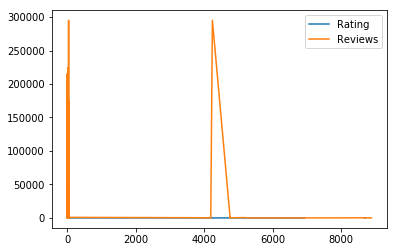

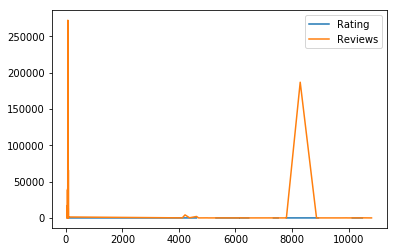

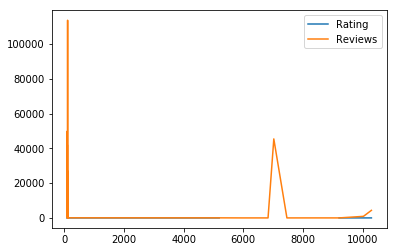

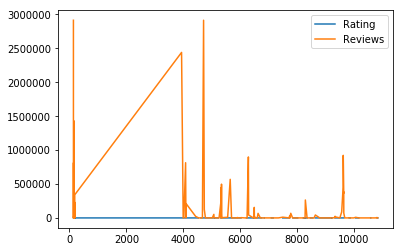

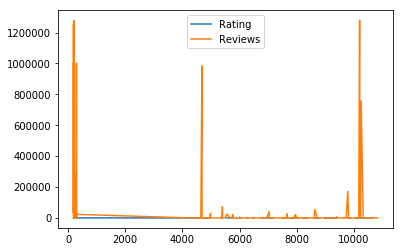

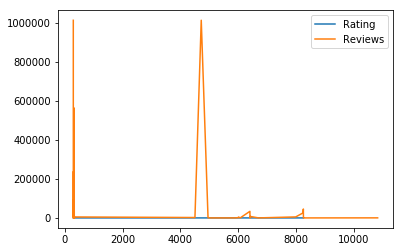

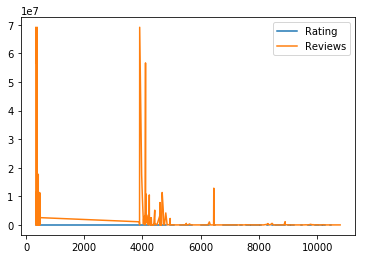

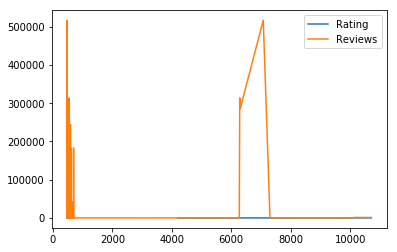

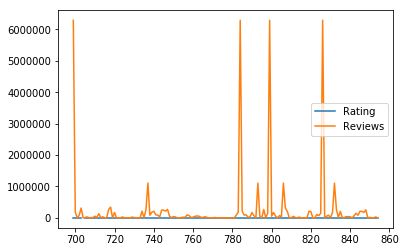

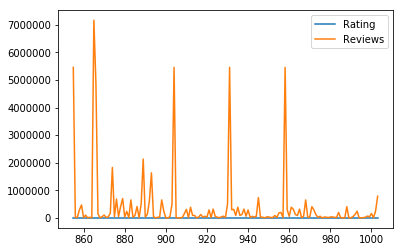

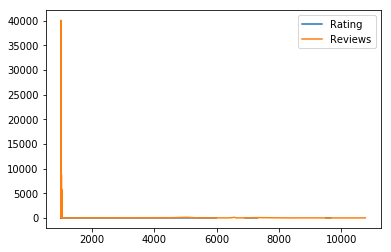

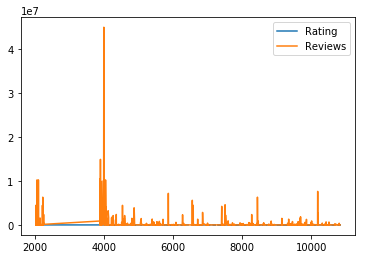

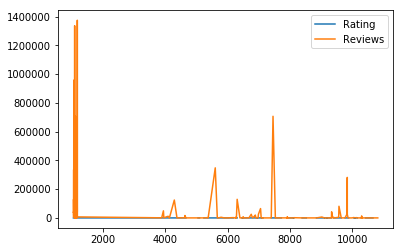

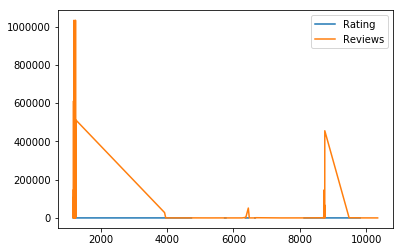

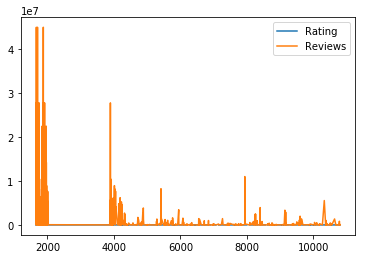

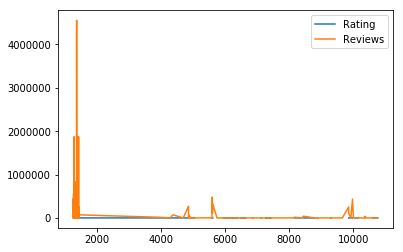

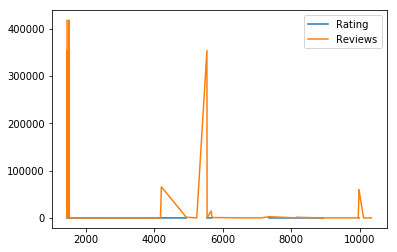

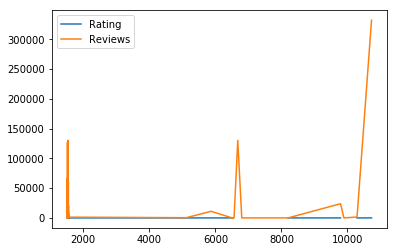

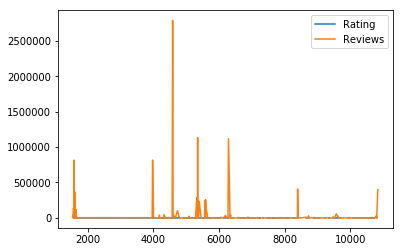

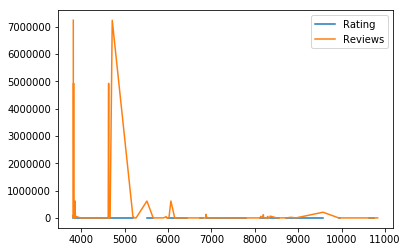

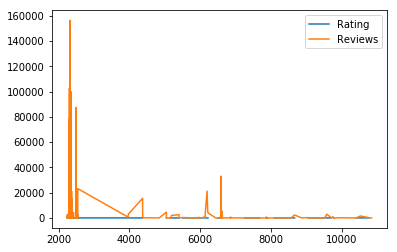

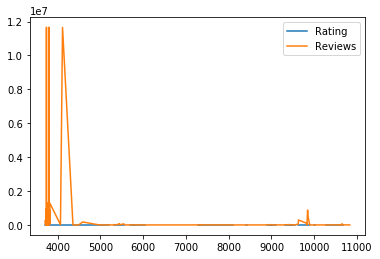

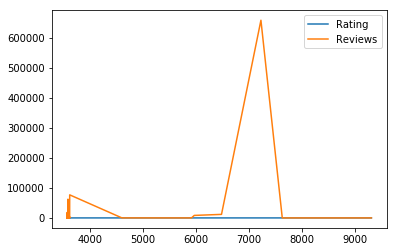

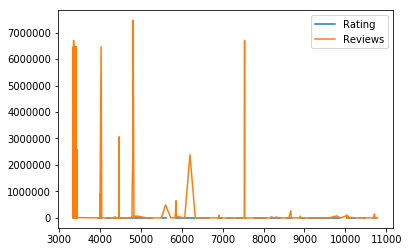

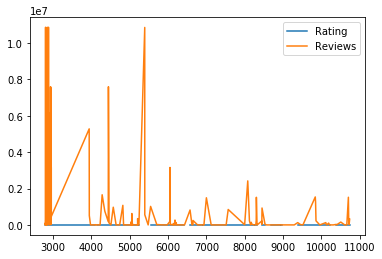

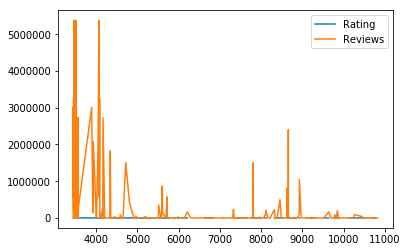

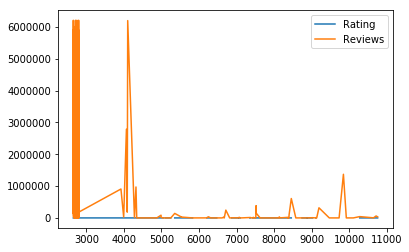

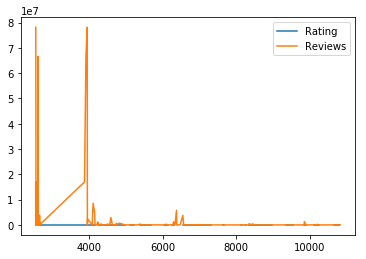

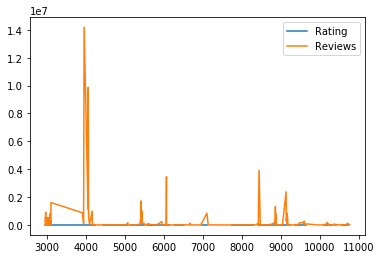

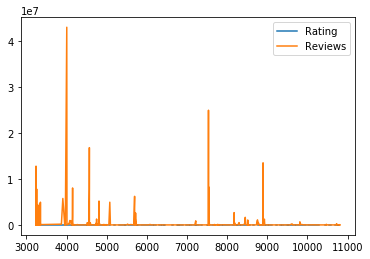

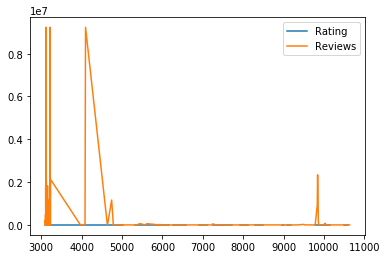

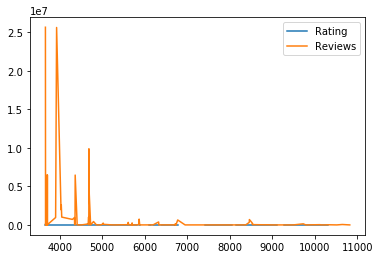

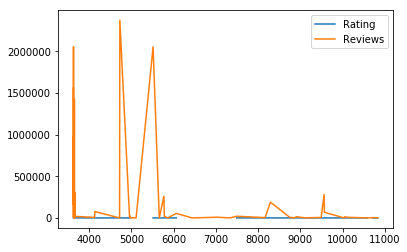

In [138]:
groupedData.plot()
